 # IMPORING LIBRARIES and DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import shap
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import pickle

c:\Users\chhon\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque

Loading Dataset

In [3]:
df = pd.read_csv("C:/Users/chhon/Python Notebooks/BCS_Win_Factor_Summer_Project/mw_pw_profiles.csv")
df.shape

(416712, 59)

In [4]:
df.columns

Index(['Unnamed: 0', 'player_id', 'match_id', 'gender', 'balls_per_over',
       'start_date', 'series_name', 'match_type', 'name_x', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_sc

# Working on Data

In [5]:
df['match_date'] = pd.to_datetime(df['start_date'])
df.head()

,Unnamed: 0,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,...,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,match_date
0,0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,...,NaN,NaN,NaN,NaN,NaN,[],5,8,17,2018-08-21
1,1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,...,NaN,NaN,NaN,NaN,NaN,[],3,0,7,2019-05-05
2,2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,...,NaN,NaN,NaN,NaN,NaN,[],1,0,5,2021-09-09
3,3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,...,NaN,NaN,NaN,NaN,NaN,[],0,0,4,2021-09-15
4,4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,...,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1,2021-09-14


In [6]:
df.sort_values(by='match_date', inplace=True)
df.tail()

,Unnamed: 0,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,...,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,match_date
121900,121900,4e38a3d6,1485778,female,6,2025-05-20,ICC Women's T20 World Cup Asia Region Qualifier,T20,R Poddar,4,...,NaN,NaN,NaN,NaN,NaN,[],-2,0,2,2025-05-20
305516,305516,bd36bc39,1485778,female,6,2025-05-20,ICC Women's T20 World Cup Asia Region Qualifier,T20,S Chaturongrattana,0,...,NaN,NaN,NaN,NaN,NaN,[],0,16,20,2025-05-20
401343,401343,f6ddfe08,1485778,female,6,2025-05-20,ICC Women's T20 World Cup Asia Region Qualifier,T20,C Sutthiruang,0,...,NaN,NaN,NaN,NaN,NaN,[],0,12,16,2025-05-20
258473,258473,a2f46292,1473500,male,6,2025-05-20,Indian Premier League,T20,KK Ahmed,0,...,NaN,NaN,NaN,NaN,NaN,[],0,-4,0,2025-05-20
238281,238281,97e6e41a,1485778,female,6,2025-05-20,ICC Women's T20 World Cup Asia Region Qualifier,T20,K Kunwar,24,...,NaN,NaN,NaN,NaN,NaN,[],25,0,29,2025-05-20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416712 entries, 397451 to 238281
Data columns (total 60 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             416712 non-null  int64         
 1   player_id              416712 non-null  object        
 2   match_id               416712 non-null  object        
 3   gender                 416712 non-null  object        
 4   balls_per_over         416712 non-null  int64         
 5   start_date             416712 non-null  object        
 6   series_name            414752 non-null  object        
 7   match_type             416712 non-null  object        
 8   name_x                 416712 non-null  object        
 9   runs_scored            416712 non-null  int64         
 10  player_out             416712 non-null  int64         
 11  balls_faced            416712 non-null  int64         
 12  fours_scored           416712 non-null  int6

In [8]:
df.isnull().sum()

Unnamed: 0                    0
player_id                     0
match_id                      0
gender                        0
balls_per_over                0
start_date                    0
series_name                1960
match_type                    0
name_x                        0
runs_scored                   0
player_out                    0
balls_faced                   0
fours_scored                  0
sixes_scored                  0
catches_taken                 0
run_out_direct                0
run_out_throw                 0
stumpings_done                0
out_kind                      0
dot_balls_as_batsman          0
order_seen                    0
balls_bowled                  0
runs_conceded                 0
wickets_taken                 0
bowled_done                   0
lbw_done                      0
maidens                       0
dot_balls_as_bowler           0
player_team                   0
opposition_team               0
name_y                        3
unique_n

In [9]:
data = df.copy()
df= df.drop(columns=[
    'gender','name_x', 'name_y','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz', 'key_cricheroes','key_crichq', 'key_cricinfo', 'key_cricinfo_2', 'key_cricinfo_3','full_name',
    'key_cricingif', 'key_cricketarchive', 'key_cricketarchive_2','key_cricketworld', 'key_nvplay', 'key_nvplay_2', 'key_opta', 'key_opta_2','key_pulse', 'key_pulse_2','batting_style', 'bowling_style','playing_role','teams'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416712 entries, 397451 to 238281
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             416712 non-null  int64         
 1   player_id              416712 non-null  object        
 2   match_id               416712 non-null  object        
 3   balls_per_over         416712 non-null  int64         
 4   start_date             416712 non-null  object        
 5   series_name            414752 non-null  object        
 6   match_type             416712 non-null  object        
 7   runs_scored            416712 non-null  int64         
 8   player_out             416712 non-null  int64         
 9   balls_faced            416712 non-null  int64         
 10  fours_scored           416712 non-null  int64         
 11  sixes_scored           416712 non-null  int64         
 12  catches_taken          416712 non-null  int6

# Feature Engineering

In [11]:
team_encoder = LabelEncoder()
opp_encoder = LabelEncoder()
matchtype_encoder = LabelEncoder()
outkind_encoder = LabelEncoder()

# Apply encodings
df['player_team_enc'] = team_encoder.fit_transform(df['player_team'])
df['opposition_team_enc'] = opp_encoder.fit_transform(df['opposition_team'])
df['match_type_enc'] = matchtype_encoder.fit_transform(df['match_type'])
df['out_kind_enc'] = outkind_encoder.fit_transform(df['out_kind'])

Generating new features

In [12]:
# Batting Features
df['boundary_runs'] = df['fours_scored'] * 4 + df['sixes_scored'] * 6
df['boundary_ratio'] = df['boundary_runs'] / df['runs_scored'].replace(0, np.nan)
df['run_per_match_avg'] = df.groupby('player_id')['runs_scored'].transform('mean')
df['batting_consistency'] = df.groupby('player_id')['runs_scored'].transform(lambda x: x.rolling(window=3, min_periods=1).std())
df['batting_strike_rate'] = df.apply(lambda row: (row['runs_scored'] / row['balls_faced']) * 100 if row['balls_faced'] > 0 else 0,axis=1)

In [13]:
# Bowling Features
df['bowling_pressure'] = df['dot_balls_as_bowler'] / df['balls_bowled'].replace(0, np.nan)
df['wicket_efficiency'] = df['wickets_taken'] / df['balls_bowled'].replace(0, np.nan)
df['bowling_economy'] = df.apply(lambda row: (row['runs_conceded'] / (row['balls_bowled'] / 6)) if row['balls_bowled'] > 0 else 0,axis=1)

In [14]:
df['fielding_contribution'] = df['catches_taken'] * 4 + (df['run_out_direct'] + df['run_out_throw']) * 3 + df['stumpings_done'] * 2
df['impact_score'] = df['runs_scored'] * df['batting_strike_rate'] + df['wickets_taken'] * 20 + df['fielding_contribution'] * 10
df['form_trend'] = df.groupby('player_id')['fantasy_score_total'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

In [15]:
df.fillna(0, inplace=True)

In [16]:
# mapping of player_id to their last match date
# This is done to avoid using retired players for the future match
last_played_map = df.groupby("player_id")["match_date"].max().to_dict()
df["last_active_date"] = df["player_id"].map(last_played_map)

Finalizing the target and features

In [17]:
drop_features = [
    'player_id', 'match_id', 'start_date', 'match_date',
    'series_name', 'match_type', 'player_team', 'out_kind',
    'fantasy_score_batting', 'fantasy_score_bowling', 'unique_name'
]

x = df.drop(columns=drop_features + ['fantasy_score_total'])
y = df['fantasy_score_total']

Splitting the data into training and testing

In [18]:
train_df = df[df['match_date'].dt.year <= 2022]
test_df = df[df['match_date'].dt.year > 2022]

x_train = train_df.drop(columns=['fantasy_score_total'])
y_train = train_df['fantasy_score_total']
x_test = test_df.drop(columns=['fantasy_score_total'])
y_test = test_df['fantasy_score_total']

x_train = x_train.select_dtypes(include=[np.number])
x_test = x_test.select_dtypes(include=[np.number])

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305151 entries, 397451 to 29558
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             305151 non-null  int64  
 1   balls_per_over         305151 non-null  int64  
 2   runs_scored            305151 non-null  int64  
 3   player_out             305151 non-null  int64  
 4   balls_faced            305151 non-null  int64  
 5   fours_scored           305151 non-null  int64  
 6   sixes_scored           305151 non-null  int64  
 7   catches_taken          305151 non-null  int64  
 8   run_out_direct         305151 non-null  int64  
 9   run_out_throw          305151 non-null  int64  
 10  stumpings_done         305151 non-null  int64  
 11  dot_balls_as_batsman   305151 non-null  int64  
 12  order_seen             305151 non-null  int64  
 13  balls_bowled           305151 non-null  int64  
 14  runs_conceded          305151 non-nul

Visualizing the samples we have on timeline

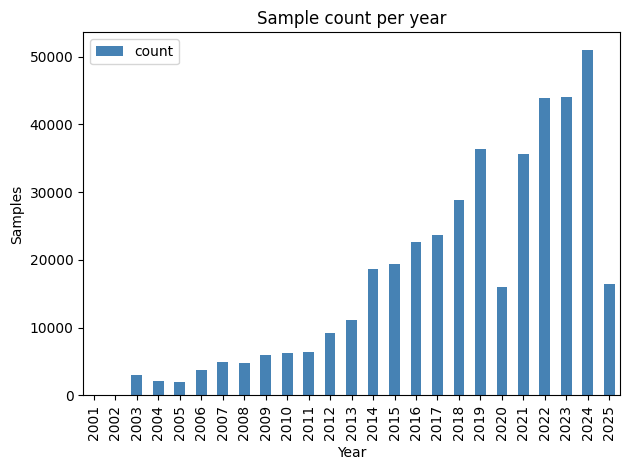

In [19]:
df['year'] = df['match_date'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Sample count per year")
plt.xlabel("Year")
plt.ylabel("Samples")
plt.legend()
plt.tight_layout()
plt.show()

# MODELS IMPLEMENTATION

## LINEAR REGRESSION

In [20]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

lr_predict = lr_model.predict(x_test)

mae_lr = mean_absolute_error(y_test, lr_predict)
mse_lr = mean_squared_error(y_test, lr_predict)
r2_lr = r2_score(y_test, lr_predict)

print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Mean Absolute Error: 0.5701647159710681
Mean Squared Error: 1.0316209131657939
R-squared: 0.9994042004787868


## DECISION TREE

In [21]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(x_train, y_train)

dt_predict = dt_model.predict(x_test)

mae_dt = mean_absolute_error(y_test, dt_predict)
mse_dt = mean_squared_error(y_test, dt_predict)
r2_dt = r2_score(y_test, dt_predict)

print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

Mean Absolute Error: 1.2893510656438125
Mean Squared Error: 3.6630315419311956
R-squared: 0.9978844627798651


## XGBOOST

In [22]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_predict = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, xgb_predict)
mse_xgb = mean_squared_error(y_test, xgb_predict)
r2_xgb = r2_score(y_test, xgb_predict)

print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)

Mean Absolute Error: 0.22631390392780304
Mean Squared Error: 0.4285660982131958
R-squared: 0.9997524619102478


In [23]:
import pickle

with open("xgb_fantasy_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


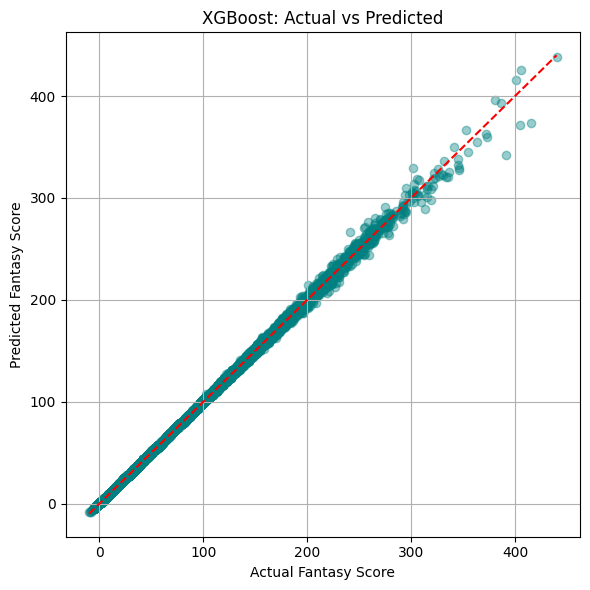

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, xgb_predict, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fantasy Score")
plt.ylabel("Predicted Fantasy Score")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

## SHAP Analysis

In [25]:
df['fielding_contribution'] *= 2
df['wicket_efficiency'] *= 1.5


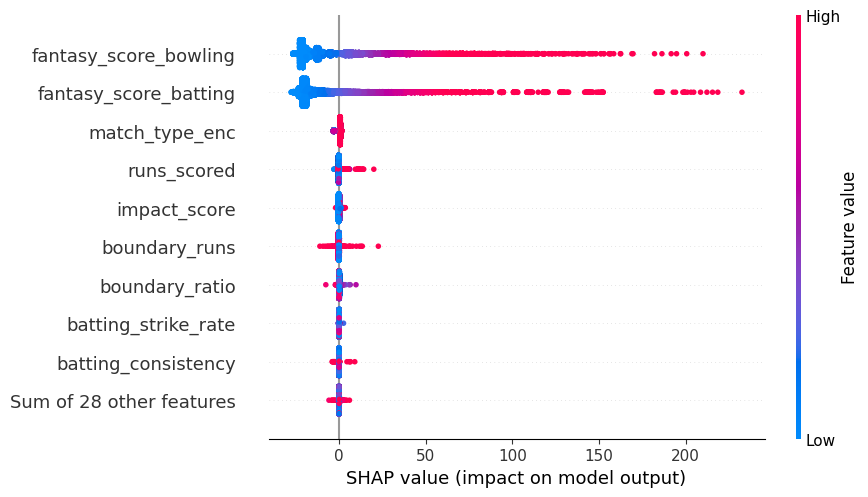

In [26]:
x_shap_sample = x_test.sample(n=10000, random_state=42)

explainer = shap.Explainer(xgb_model)
shap_values = explainer(x_shap_sample)

shap.plots.beeswarm(shap_values)


## PCA Implementation

In [27]:
scaler = StandardScaler()
x = x.select_dtypes(include=[np.number])
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=0.95, random_state=42)
x_pca = pca.fit_transform(x_scaled)

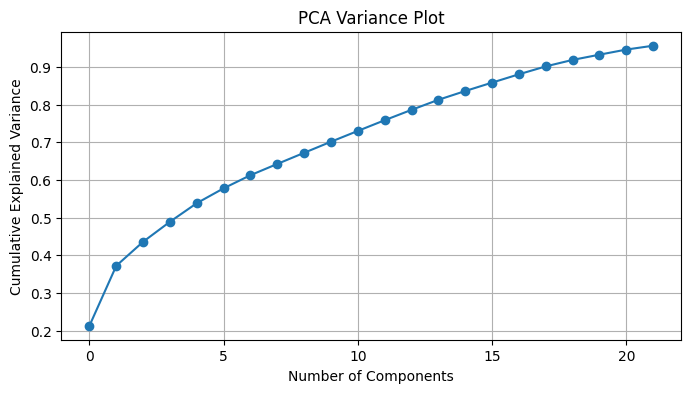

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Plot')
plt.grid(True)
plt.show()

Linear Regression after PCA

In [29]:
x_train_pca = x_pca[df['match_date'].dt.year <= 2022]
x_test_pca = x_pca[df['match_date'].dt.year > 2022]
lr_after_pca = LinearRegression()
lr_after_pca.fit(x_train_pca, y_train)

lr_predict_after_pca = lr_after_pca.predict(x_test_pca)

mae_lr_after_pca = mean_absolute_error(y_test, lr_predict_after_pca)
mse_lr_after_pca = mean_squared_error(y_test, lr_predict_after_pca)
r2_lr_after_pca = r2_score(y_test, lr_predict_after_pca)

print("Mean Absolute Error:", mae_lr_after_pca)
print("Mean Squared Error:", mse_lr_after_pca)
print("R-squared:", r2_lr_after_pca)

Mean Absolute Error: 5.853968231091891
Mean Squared Error: 92.88674110812651
R-squared: 0.946354445540024


## Inference Pipeline

In [30]:
with open("xgb_fantasy_model.pkl", "rb") as f:
    xgb_model = pickle.load(f)

In [31]:

# Inference Function
def predict_top11_players(player_ids, match_date_str):
    match_date = pd.to_datetime(match_date_str)

    # Filter relevant rows from full dataframe
    player_df = df[
        (df["player_id"].isin(player_ids)) &
        (df["match_date"] < match_date)  # ensure training happens before prediction date (no forward bias)
    ]
    # Only include players who have played within the last 2 years before the match
    recency_cutoff = match_date - pd.Timedelta(days=730)
    player_df = player_df[player_df["last_active_date"] > recency_cutoff]
    # Use the most recent performance for each player
    player_df = player_df.sort_values(by="match_date").groupby("player_id").tail(1)




    # Preserve metadata
    meta_cols = ["player_id","unique_name","player_team", "fantasy_score_total"]

    X_input = player_df.drop(columns=["fantasy_score_total", "player_id","unique_name", "player_team","match_id", "match_date"], errors="ignore")
    X_input = X_input.select_dtypes(include=[np.number])

    # Fix for feature mismatch
    model_features = xgb_model.get_booster().feature_names
    for col in model_features:
        if col not in X_input.columns:
            X_input[col] = 0
    X_input = X_input[model_features]  # reorder

    # Predict
    predictions = xgb_model.predict(X_input)


    # Final output
    result = player_df[meta_cols].copy()
    result["predicted_score"] = predictions
    result = result.sort_values(by="predicted_score", ascending=False).head(11)

    return result[["player_id","unique_name", "player_team", "predicted_score", "fantasy_score_total"]]

#  Example usage
match_date = pd.to_datetime("2023-04-15")

# Get 22 players who actually played close to this date (say ±3 days)
window_df = df[(df["match_date"] >= match_date - pd.Timedelta(days=3)) &(df["match_date"] <= match_date + pd.Timedelta(days=3))]

sample_player_ids = (window_df["player_id"].dropna().unique()[:22].tolist())

match_date = "2023-04-15"

top_11_df = predict_top11_players(sample_player_ids, match_date)
top_11_df


,player_id,unique_name,player_team,predicted_score,fantasy_score_total
362368,dfdaca74,RC Belbashi,Barmy Army,185.312744,187
112857,495d42a5,R Ashwin,Rajasthan Royals,113.083984,113
241371,99b75528,JC Buttler,Rajasthan Royals,72.577271,73
266121,a7cd72b2,SA Campbelle,Barmy Army,71.191635,71
22993,106135f5,Ruchitha Venkatesh,Barmy Army,68.043144,68
114759,4a8a2e3b,MS Dhoni,Chennai Super Kings,56.941605,57
109222,46a9bea1,TU Deshpande,Chennai Super Kings,53.948421,54
289259,b483905d,Akash Singh,Chennai Super Kings,53.948421,54
66623,2c25d4f5,D Padikkal,Rajasthan Royals,52.940598,53
352299,d945db3e,NH Patel,Spirit,52.252716,52


In [32]:
# sampling based on actual match_id
match_date = pd.to_datetime("2023-04-15")

# Find the match_id played on this exact date
match_ids_on_date = df[df["match_date"] == match_date]["match_id"].unique()

if len(match_ids_on_date) == 0:
    raise ValueError("No match found on this date in the dataset.")
elif len(match_ids_on_date) > 1:
    print("Multiple matches on this date. Picking the first one.")

actual_match_id = match_ids_on_date[0]

# Get the actual 22 player IDs who played in that match
sample_ids = df[df["match_id"] == actual_match_id]["player_id"].dropna().unique()

# Convert to comma-separated string for Gradio input
input_string = ", ".join(sample_ids[:22])
print( input_string)

Multiple matches on this date. Picking the first one.
dcce6f09, 3a60e0b5, 3355b542, c8f5f961, 8b3e9c7c, b681e71e, 2f49c897, f986ca1a, c03f1114, 54e52590, dd7e9b3b, 93b4fc78, 0a8fce53, f9e6e7ef, ba607b88, acdc62f5, a97c8ec2, 8d2c70ad, 3d8feaf8, ad3b6e95, ad427b5c, da934ee8


In [33]:
with open("xgb_fantasy_model.pkl", "rb") as f:
    xgb_model = pickle.load(f)

In [34]:
def predict_top11_interface(player_ids_str, match_date_str):
    try:
        player_ids = [pid.strip() for pid in player_ids_str.split(",")]
        result = predict_top11_players(player_ids, match_date_str)

        if result.empty:
            return pd.DataFrame(columns=["unique_name", "player_id", "player_team", "predicted_score", "fantasy_score_total"])

        return result[["unique_name", "player_id", "player_team", "predicted_score", "fantasy_score_total"]]

    except Exception as e:
        return pd.DataFrame({"Error": [str(e)]})


In [35]:
gr.Interface(
    fn=predict_top11_interface,
    inputs=[
        gr.Textbox(label="Enter 22 Player IDs (comma-separated)", lines=2, placeholder="e.g. 0c2730df, 8fb88e, ..."),
        gr.Textbox(label="Match Date (YYYY-MM-DD)", placeholder="e.g. 2023-04-15")
    ],
    outputs=gr.Dataframe(headers=["Name", "Player ID", "Team", "Predicted Points", "Actual Points"]),
    title=" Fantasy Team Selector",
    description="Enter 22 player IDs, enter match date, and get the predicted best XI with fantasy points in tabular form."
).launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [36]:
match_date = pd.to_datetime("2023-04-15")
df[df["match_date"] == match_date]["match_id"].unique()



array(['1359494', '1366030', '1366031', '1339615', '1359495'],
      dtype=object)

## Implementation of Reinforcement Learning


In [37]:
if 'credit' not in df.columns:
    df['credit'] = 8.0 + (df['fantasy_score_total'] / df['fantasy_score_total'].max()) * 3  # dummy logic


In [38]:
# Generate recent form: rolling average of fantasy score (last 3 matches per player)
df['match_date'] = pd.to_datetime(df['match_date'])  # ensure correct dtype

df.sort_values(by=['player_id', 'match_date'], inplace=True)
df['recent_form'] = df.groupby('player_id')['fantasy_score_total'].transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
df['recent_form'].fillna(df['fantasy_score_total'].mean(), inplace=True)


In [39]:
if df['match_date'].dtype != 'datetime64[ns]':
    df['match_date'] = pd.to_datetime(df['match_date'])

In [40]:
# Generating recent_form
if 'recent_form' not in df.columns:
    df.sort_values(by=['player_id', 'match_date'], inplace=True)
    df['recent_form'] = df.groupby('player_id')['fantasy_score_total'].transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
    df['recent_form'].fillna(df['fantasy_score_total'].mean(), inplace=True)

In [41]:
def assign_role(row):
    if row['stumpings_done'] > 0:
        return 'WK'
    elif row['fantasy_score_batting'] >= 1.3 * row['fantasy_score_bowling']:
        return 'BAT'
    elif row['fantasy_score_bowling'] >= 1.3 * row['fantasy_score_batting']:
        return 'BWL'
    else:
        return 'AR'

role_map = {'WK': 3, 'BAT': 1, 'BWL': 0, 'AR': 2}
df['role'] = df.apply(assign_role, axis=1)
df['position'] = df['role'].map(role_map)

In [42]:
match_date = pd.to_datetime("2023-04-15")
match_ids_on_date = df[df["match_date"] == match_date]["match_id"].unique()

if len(match_ids_on_date) == 0:
    raise ValueError("No match found on this date in the dataset.")
elif len(match_ids_on_date) > 1:
    print("Multiple matches on this date. Picking the first one.")

actual_match_id = match_ids_on_date[1]
match_df = df[df['match_id'] == actual_match_id].copy()

Multiple matches on this date. Picking the first one.


In [43]:
# Taking latest stat per player (avoiding duplicates)
player_pool = match_df.groupby('player_id').last().reset_index()
assert len(player_pool) >= 22, f"Match has insufficient players: {len(player_pool)}"
player_pool = player_pool.head(22).reset_index(drop=True)
print(f" Using match_id {actual_match_id} with {len(player_pool)} players")

 Using match_id 1359494 with 22 players


In [44]:
class Dream11Env:
    def __init__(self, player_pool_df, max_team_size=11, max_budget=100, max_players_per_team=7):
        self.original_df = player_pool_df.reset_index(drop=True)
        self.max_team_size = max_team_size
        self.max_budget = max_budget
        self.max_players_per_team = max_players_per_team
        self.reset()

    def reset(self):
        self.players_df = self.original_df.copy().reset_index(drop=True)
        self.selected_players = []
        self.selected_ids = set()
        self.budget_used = 0
        self.team_counts = {}
        self.role_counts = {0:0, 1:0, 2:0, 3:0}  # BWL, BAT, AR, WK
        self.done = False
        return self._get_state()

    def _get_state(self):
        state = []
        for idx, row in self.players_df.iterrows():
            if idx in self.selected_ids:
                state.append(np.zeros(self._feature_dim()))
            else:
                state.append(self._extract_features(row))
        return np.array(state, dtype=np.float32)

    def _feature_dim(self):
        return 5

    def _extract_features(self, row):
        return np.array([
            row['credit'],
            row['recent_form'],
            row['fantasy_score_total'],
            1.0 if row.name in self.selected_ids else 0.0,
            row['position']
        ])

    def get_action_space(self):
        return [i for i in range(len(self.players_df)) if i not in self.selected_ids]

    def step(self, action_idx):
        if action_idx in self.selected_ids or self.done:
            return self._get_state(), -100.0, True, {}

        player = self.players_df.iloc[action_idx]
        self.selected_players.append(player)
        self.selected_ids.add(action_idx)
        self.budget_used += player['credit']
        team = player['player_team']
        self.team_counts[team] = self.team_counts.get(team, 0) + 1
        self.role_counts[player['position']] += 1

        if len(self.selected_players) == self.max_team_size:
            self.done = True
            total_points = sum(p['fantasy_score_total'] for p in self.selected_players)

            penalty = 0
            if self.budget_used > self.max_budget:
                penalty -= 50
            if any(count > self.max_players_per_team for count in self.team_counts.values()):
                penalty -= 50

            # ✅ New check: must include at least 1 of each role
            if any(count == 0 for count in self.role_counts.values()):
                penalty -= 50

            return self._get_state(), total_points + penalty, self.done, {}
        else:
            return self._get_state(), 0.0, self.done, {}

In [45]:
class DQNetwork(nn.Module):
    def __init__(self, input_dim=5, num_players=22, hidden_dim=64):
        super(DQNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_players * input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_players)
        )

    def forward(self, x):
        return self.fc(x)

In [46]:
class DQNAgent:
    def __init__(self, lr=1e-3, gamma=0.99, epsilon=1.0, epsilon_min=0.1, decay=0.995):
        self.model = DQNetwork()
        self.target_model = DQNetwork()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.decay = decay
        self.memory = deque(maxlen=10000)
        self.batch_size = 64
        self.update_target()

    def update_target(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def act(self, state, valid_actions):
        if np.random.rand() < self.epsilon:
            return random.choice(valid_actions)
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        q_values = self.model(state).detach().numpy().flatten()
        q_values = [(idx, q_values[idx]) for idx in valid_actions]
        return max(q_values, key=lambda x: x[1])[0]

    def remember(self, s, a, r, s_, done):
        self.memory.append((s, a, r, s_, done))

    def train(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        s_batch, a_batch, r_batch, s2_batch, d_batch = zip(*batch)

        s_batch = torch.tensor(np.array(s_batch), dtype=torch.float32)
        s2_batch = torch.tensor(np.array(s2_batch), dtype=torch.float32)
        a_batch = torch.tensor(a_batch, dtype=torch.int64)
        r_batch = torch.tensor(r_batch, dtype=torch.float32)
        d_batch = torch.tensor(d_batch, dtype=torch.float32)

        q_values = self.model(s_batch)
        next_q = self.target_model(s2_batch).detach().max(1)[0]
        target = q_values.clone()
        for i in range(self.batch_size):
            target[i, a_batch[i]] = r_batch[i] + self.gamma * next_q[i] * (1 - d_batch[i])

        loss = self.loss_fn(q_values, target)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.epsilon = max(self.epsilon_min, self.epsilon * self.decay)

In [47]:
env = Dream11Env(player_pool)
agent = DQNAgent()
reward_history = []
num_episodes = 500

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for _ in range(11):
        valid_actions = env.get_action_space()
        action = agent.act(state, valid_actions)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done:
            break

    agent.train()
    if episode % 20 == 0:
        agent.update_target()

    reward_history.append(total_reward)
    if (episode + 1) % 50 == 0:
        print(f"Episode {episode+1}: Total Reward = {total_reward:.2f}, Epsilon = {agent.epsilon:.3f}")

Episode 50: Total Reward = 386.00, Epsilon = 0.798
Episode 100: Total Reward = 378.00, Epsilon = 0.621
Episode 150: Total Reward = 412.00, Epsilon = 0.483
Episode 200: Total Reward = 408.00, Epsilon = 0.376
Episode 250: Total Reward = 293.00, Epsilon = 0.293
Episode 300: Total Reward = 326.00, Epsilon = 0.228
Episode 350: Total Reward = 364.00, Epsilon = 0.177
Episode 400: Total Reward = 453.00, Epsilon = 0.138
Episode 450: Total Reward = 404.00, Epsilon = 0.107
Episode 500: Total Reward = 523.00, Epsilon = 0.100



 Final Selected Team:

          unique_name                  player_team    credit  \
19          MK Lomror  Royal Challengers Bangalore  8.196364   
17         KD Karthik  Royal Challengers Bangalore  8.010909   
16            V Kohli  Royal Challengers Bangalore  8.545455   
10          MK Pandey               Delhi Capitals  8.376364   
7   Vijaykumar Vyshak  Royal Challengers Bangalore  8.474545   
9       Kuldeep Yadav               Delhi Capitals  8.349091   
12           A Nortje               Delhi Capitals  8.190909   
2      Mohammed Siraj  Royal Challengers Bangalore  8.403636   
6            MR Marsh               Delhi Capitals  8.283636   
14        Lalit Yadav               Delhi Capitals  8.223636   
21           YV Dhull               Delhi Capitals  8.070909   

    fantasy_score_total  recent_form  position  
19                   36    32.666667         1  
17                    2    20.333333         0  
16                  100    84.333333         1  
10         

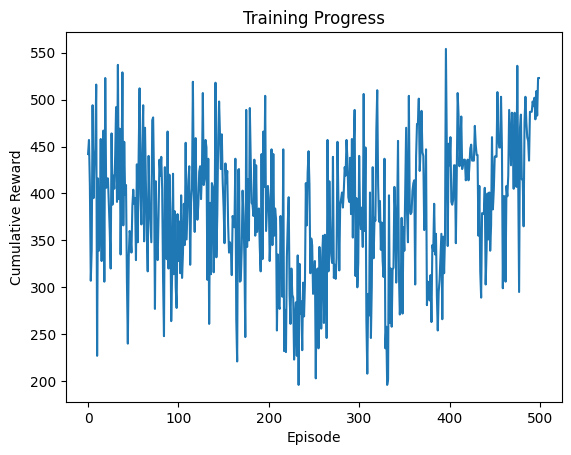

In [48]:
state = env.reset()
final_team = []

for _ in range(11):
    valid_actions = env.get_action_space()
    action = agent.act(state, valid_actions)
    state, _, done, _ = env.step(action)
    final_team.append(action)
    if done:
        break

print("\n Final Selected Team:\n")
print(env.players_df.iloc[final_team][['unique_name', 'player_team', 'credit', 'fantasy_score_total', 'recent_form', 'position']])

plt.plot(reward_history)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Training Progress")
plt.show()